In [ ]:
"""
任务：
1. 画出RM,DIS,PTRATIO,LSTAT与y的散点图,分析特征与y是否有线性关系?
2. 尝试进行线性回归,使用RM,DIS,PTRATIO,LSTAT预测房价y,写出回归方程
3. 解释下RM与Y的关系?
4. 对某新小区,其RM=8,DIS=2,PTRATIO=12,LSTAT=22,预测该小区房价
"""

In [1]:
# 加载数据
import pandas as pd
import numpy as np
from sklearn import datasets
x_df = pd.DataFrame(datasets.load_boston()['data'],columns=datasets.load_boston()['feature_names']) 
y_df = pd.DataFrame(datasets.load_boston()['target'],columns=['y']) 
df = x_df.join(y_df)

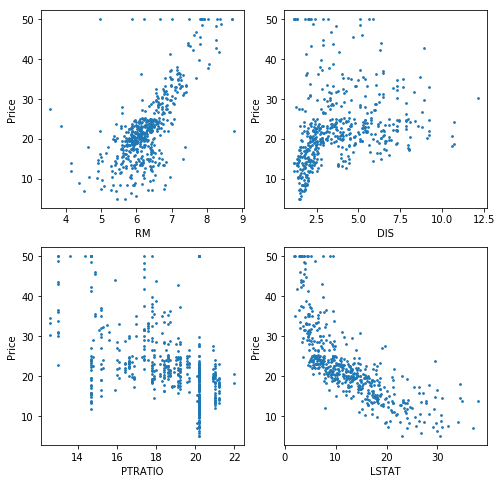

In [7]:
# 1. 绘制散点图
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))       # 设置桌布大小
factor_list = ['RM', 'DIS', 'PTRATIO', 'LSTAT']

def plot(feature):
	x_axis = list(df[feature])
	y_axis = list(df['y'])
	plt.xlabel(feature)
	plt.ylabel('Price')
	plt.scatter(x_axis,y_axis,s=3)

for i in range(len(factor_list)):
	index = i+1
	factor = factor_list[i]
	plt.subplot(2,2,index)      # 2*2 展示散点图 
	plot(factor)
plt.show()


### 1. 从散点图中可以看出：RM,PTRATIO,LSTAT与price有较为明显的线性相关性，而DIS与price没有明显的线性相关性

In [8]:
# 2. 建立回归方程
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_df[factor_list], y_df)
print(model.coef_)      # 系数
print(model.intercept_) # 截距

[[ 4.22379223 -0.55192634 -0.97364584 -0.66543598]]
[24.47135762]


### 2. 回归方程如下：
price = 24.47135762 + 4.22379223*RM - 0.55192634*DIS - 0.97364584*PTRATIO - 0.66543598*LSTAT

### 3. 解释下RM与Y的关系
从第一步的散点图可以看出RM和PRICE呈正相关关系
从第二步的回归方程可知，RM的系数为4.22379223，表示其他变量固定的情况下，RM每增加一个单位，PRICE平均增加4.22379223个单位

In [9]:
# 4. 带入RM=8,DIS=2,PTRATIO=12,LSTAT=22，预测房价
print(24.47135762 + 4.22379223 * 8 - 0.55192634 * 2 - 0.97364584 * 12 - 0.66543598 * 22)

30.83450114


### 4. 预测房价为30.83450114